In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive/')

Mounted at /content/drive


['Mane_Minasyan_Assignment group functioning - individual part 2023.docx',
 'Report Group 6.gdoc',
 'Meeting reports',
 'Protocol Elements ROSE study_2024.gdoc',
 'ROSE STUDY GROUP 17 SLIDES_group17.pptx',
 'Tree.html',
 'Data Visualization-Visual 1 demo.mov',
 'Demo-visual1.mov',
 'group34_report_design.gdoc',
 'Kaggle',
 'Colab Notebooks',
 'UHASSELT_signed.pdf',
 '1_Spark_Overview.ipynb',
 '2_Exercises.ipynb',
 '1_Spark_Overview (1).ipynb',
 '3_Dataframe_Overview.ipynb',
 'ANN_&_DL_2425_Homework_ManeMinasyan.ipynb',
 'world_happiness_2015.csv',
 'dimensionality_reduction_countries_ManeMinasyan.ipynb',
 'Digital Epidemology',
 'Deep Learning Project',
 '2_Exercises_filled_ManeMinasyan.ipynb',
 '4_Exercises_Dataframe_filled_ManeMinasyan.ipynb',
 'tutorial2_filled_ManeMinasyan.ipynb',
 'tutorial.ipynb',
 'Master thesis intermediate presentations_ManeMinasyan.pptx',
 'Master thesis intermediate presentations_ManeMinasyan.pdf',
 'March28_Session 3_Mane_Minasyan_intermediate presentation.

In [12]:
df_flu = pd.read_csv("/content/drive/My Drive/Digital Epidemology/data/flu_data_complete_new.csv")


In [ ]:
print(df_flu["INF_A"].min(), df_flu["INF_A"].max())
print(df_flu["INF_B"].min(), df_flu["INF_B"].max())
print(df_flu["INF_ALL"].min(), df_flu["INF_ALL"].max())

0.0 2241.0
0.0 729.0
0.0 2248.0


In [13]:
X = df_flu[['wind_speed', 'hourly_highest', 'hourly_lowest', '24_avg_temp',
       'sunshine_duration', '24_precipitation', '24_avg_humidity',
       'evaporation','flu: (Netherlands)',
       'Influenza: (Netherlands)', 'Griep: (Netherlands)', 'Total Search',
       'ISO_YEAR', 'ISO_WEEK']]

y = df_flu['INF_ALL']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [ ]:
print("Linear Regression")
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Linear Regression


In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE Score: {rmse}")

MAE: 163.47037267660343
R² Score: 0.4082397133159631
RMSE Score: 246.9258407842451


**XGBoost model**

In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE Score: {rmse}")

MAE: 118.02930935497942
R² Score: 0.3158728961468391
Best Model RMSE Score: 265.4984753994103


In [ ]:
print(X.shape)

(144, 15)


**Random Forest**

In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [16]:
rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                               param_distributions=param_grid,
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [18]:
best_rf = rf_random.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [19]:
print(f"Best Model MAE: {mean_absolute_error(y_test, y_pred_best)}")
print(f"Best Model R² Score: {r2_score(y_test, y_pred_best)}")
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
print(f"Best Model RMSE Score: {rmse}")

Best Model MAE: 97.86398233926032
Best Model R² Score: 0.7206130611146253
Best Model RMSE Score: 169.66672730808776


                     Feature  Importance
10      Griep: (Netherlands)    0.322583
9   Influenza: (Netherlands)    0.318603
12                  ISO_YEAR    0.085326
11              Total Search    0.075872
13                  ISO_WEEK    0.072384
3                24_avg_temp    0.041327
1             hourly_highest    0.019850
5           24_precipitation    0.014698
7                evaporation    0.011201
0                 wind_speed    0.011169


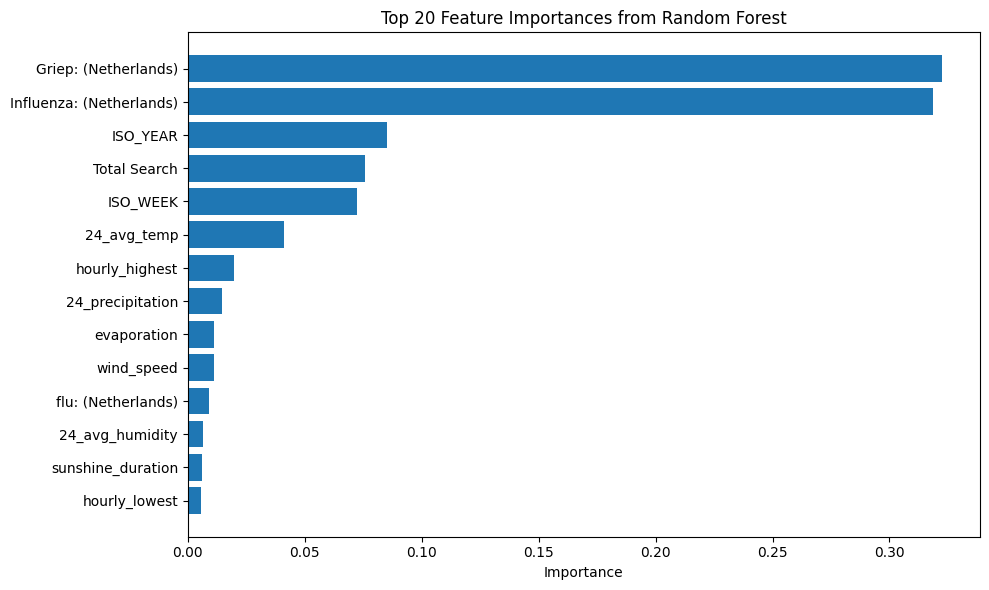

In [20]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importance_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances from Random Forest")
plt.tight_layout()
plt.show()